In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Convolution

Let the convolution sum of a linear, time invariant (LTI) system $y[n]$ with some impulse respoance $h[n]$ and some input $x[n]$ be defined as 
$$ y[n] = \sum_{k=-\infty}^\infty x[k] h[n - k]. $$

Now let
$$ h[n] = \begin{cases}
        1, \text{ for } 0 \leq n \leq 2, \\
        0, \text{ otherwise}
        \end{cases}
$$

and
$$ x[n] = \begin{cases}
        0.5, \text{ for } n = 0,\\
        2, \text{ for } n = 1,\\
        0, \text{ otherwise}.
        \end{cases}
$$

## Define your signal and impulse response

In [2]:
sample_points = np.arange(10)

## Define your signal x[n] and filter response h[n] for n in [-2, 10]
x = lambda n: 0.5*(n == 0) + 2.*(n == 1)
h = lambda n: 1.*(0 <= n <= 2)

xn = np.array([x(n) for n in sample_points])
hn = np.array([h(n) for n in sample_points])

##
print('Resulting arrays:\n',
      f'n = {sample_points},\n x = {xn},\n h = {hn}.')

Resulting arrays:
 n = [0 1 2 3 4 5 6 7 8 9],
 x = [0.5 2.  0.  0.  0.  0.  0.  0.  0.  0. ],
 h = [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.].


### Plot your signals
and sanity check

In [45]:
def lollipop(axis:plt.axis, x:np.ndarray, y:np.ndarray, colour:str, label:str) -> None:
    """ You are also free to use pyplot.stem(),
        I find mine nicer."""
    ax.scatter(x, y, c=colour, label=label, linewidths=6)
    ax.vlines(x, ymin=0, ymax=y, colors=colour)
    

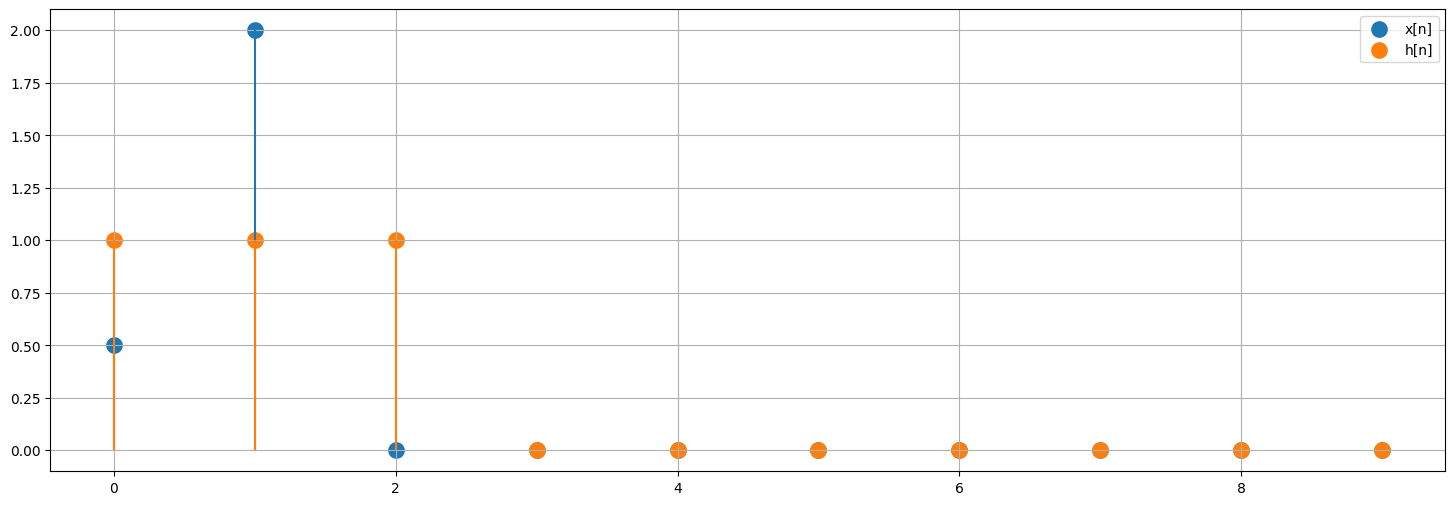

In [46]:
fig, ax = plt.subplots(figsize=(18, 6))

lollipop(ax, sample_points, xn, 'tab:blue', label='x[n]')
lollipop(ax, sample_points, hn, 'tab:orange', label='h[n]')

ax.legend()
ax.grid()
plt.show()

## Convolution sum

In [47]:
def conv_sum(signal: np.ndarray, rsp: np.ndarray) -> np.ndarray:
    ## write some code that computes the convolution sum of input arrays signal, rsp (<- impulse response) and output some array y.
    rsp_flipped = np.append(np.flip(rsp), np.zeros(len(signal)))
    out = np.zeros(len(signal))
    
    for i in range(len(sample_points)):
        # shift flipped rsp to right by one
        rsp_flipped = np.append([0.], rsp_flipped[:-1])
        
        # calculate the conv. sum
        out[i] = np.sum(signal * rsp_flipped[len(signal):])
    
    return out


In [48]:
yn = conv_sum(xn, hn)

## Plot
and compare to example in the book.

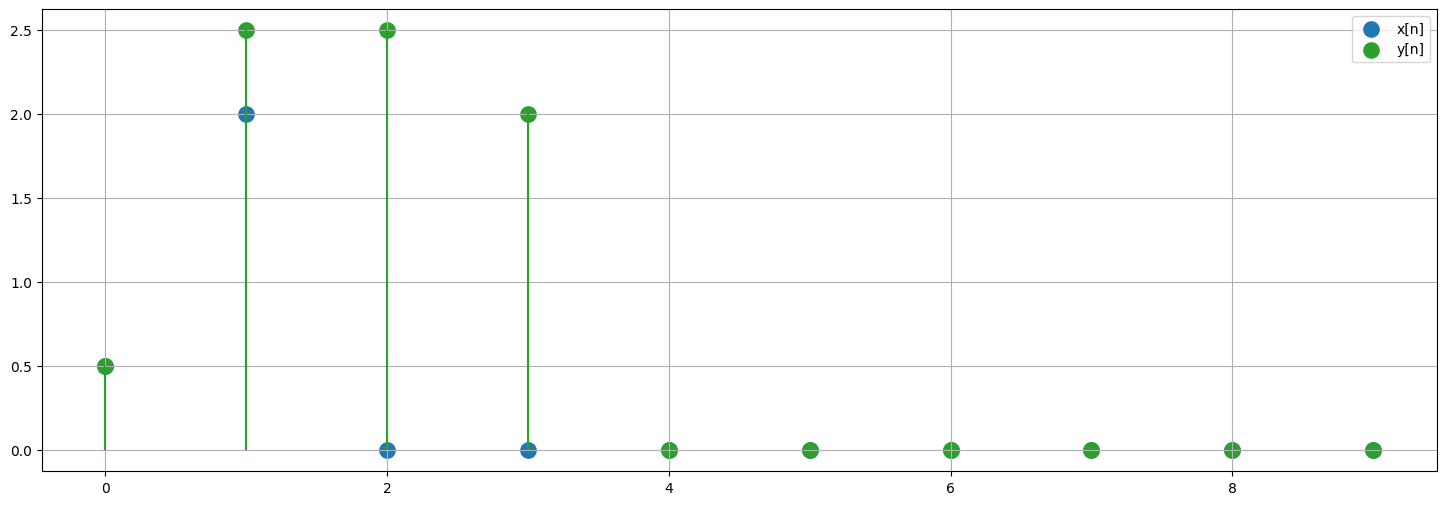

In [49]:
fig, ax = plt.subplots(figsize=(18, 6))

lollipop(ax, sample_points, xn, 'tab:blue', label='x[n]')
lollipop(ax, sample_points, yn, 'tab:green', label='y[n]')

ax.legend()
ax.grid()
plt.show()